<a href="https://colab.research.google.com/github/pepemesquita/CNC/blob/main/Relat%C3%B3rio_1__Pedro_Henrique_Lima_de_Mesquita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relatório 1 – Resolução Numérica de Equações Algébricas e Transcendentes**
Aluno: Pedro Henrique Lima de Mesquita

Matricula: 20200862


#Imports

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import time
import psutil
import math

#Métodos

Bissecção

In [ ]:
def bisseccao(a, b, epsilon=None, max_iteracoes=None):
    if f(a) * f(b) > 0:
        return None

    iteracoes = 0
    while True:
        c = (a + b) / 2
        fc = f(c)

        if fc == 0 or (epsilon is not None and abs(b - a) < epsilon) or (max_iteracoes is not None and iteracoes >= max_iteracoes):
            return iteracoes, c

        if f(a) * fc < 0:
            b = c
        else:
            a = c

        iteracoes += 1

Falsa Posição

In [ ]:
def falsa_posicao(a, b, epsilon, max_iteracoes):
    if f(a) * f(b) >= 0:
        return None

    x = (a * f(b) - b * f(a)) / (f(b) - f(a))
    iteracoes = 0

    if max_iteracoes is None:
        while abs(f(x)) > epsilon:
            iteracoes += 1
            if f(a) * f(x) < 0.0:
                b = x
            else:
                a = x
            x = (a * f(b) - b * f(a)) / (f(b) - f(a))
    else:
        while abs(f(x)) > epsilon and iteracoes < max_iteracoes:
            iteracoes += 1
            if f(a) * f(x) < 0.0:
                b = x
            else:
                a = x
            x = (a * f(b) - b * f(a)) / (f(b) - f(a))

    return iteracoes, x

In [ ]:
def falsa_posicao_com_erro(f, a, b, epsilon=None, max_iteracoes=None):
    x = np.linspace(a, b, 1000)
    y = f(x)

    iteracoes = 0
    x_anterior = None
    erro_relativo = None

    while True:
        x_novo = (a * f(b) - b * f(a)) / (f(b) - f(a))

        if x_anterior is not None:
            erro_relativo = np.abs((x_novo - x_anterior) / x_novo) * 100
            print(f"Iteração {iteracoes}: Raiz = {x_novo}, Erro Relativo Aproximado = {erro_relativo}%")

        if f(a) * f(x_novo) < 0:
            b = x_novo
        else:
            a = x_novo

        x_anterior = x_novo
        iteracoes += 1

        if epsilon is not None and erro_relativo is not None and erro_relativo < epsilon:
            break

        if max_iteracoes is not None and iteracoes > max_iteracoes:
            break

    return iteracoes, x_novo

a = 0
b = 5
epsilon = 0.001
max_iteracoes = 3

resultado = falsa_posicao_com_erro(f, a, b, epsilon, max_iteracoes)
if resultado is None:
    print("\nMétodo da Falsa Posição falhou.")

Iteração 1: Raiz = 1.9865427542648777, Erro Relativo Aproximado = 27.895108990135114%
Iteração 2: Raiz = 2.0269729728704076, Erro Relativo Aproximado = 1.9946106409241566%
Iteração 3: Raiz = 2.026905394164452, Erro Relativo Aproximado = 0.0033340828906076167%


Newton Raphson

In [ ]:
def newton_raphson(func, x0, epsilon, max_iteracoes):
    x = sp.Symbol('x')
    f = sp.sympify(func)
    f_prime = f.diff(x)
    f = sp.lambdify(x, f)
    f_prime = sp.lambdify(x, f_prime)

    x_n = x0
    iteracoes = 0
    if max_iteracoes is not None and epsilon is not None:
      while abs(f(x_n)) > epsilon and iteracoes < max_iteracoes:
        if f_prime(x_n) == 0:
          return None
        x_n = x_n - f(x_n) / f_prime(x_n)
        iteracoes += 1

      if abs(f(x_n)) <= epsilon:
          return iteracoes, x_n
      else:
          return None
    if max_iteracoes == None:
      while abs(f(x_n)) > epsilon:
        if f_prime(x_n) == 0:
          return None
        x_n = x_n - f(x_n) / f_prime(x_n)
        iteracoes += 1

      if abs(f(x_n)) <= epsilon:
          return iteracoes, x_n
      else:
          return None

Secante


In [ ]:
def secante(f, x0, x1, epsilon, max_iteracoes):
    iteracoes = 0
    if max_iteracoes is None:
      while abs(f(x1)) > epsilon:
          x_new = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
          x0, x1 = x1, x_new
          iteracoes += 1
    else:
      while abs(f(x1)) > epsilon and iteracoes < max_iteracoes:
          x_new = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
          x0, x1 = x1, x_new
          iteracoes += 1
    return iteracoes, x1

Plotagem dos gráficos


In [ ]:
def plotagem(f, a, b):
    x_vals = np.linspace(a, b, 500)
    y_vals = np.array([f(x) for x in x_vals])

    plt.plot(x_vals, y_vals)
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('Gráfico de f(t)')
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

#Questão 1
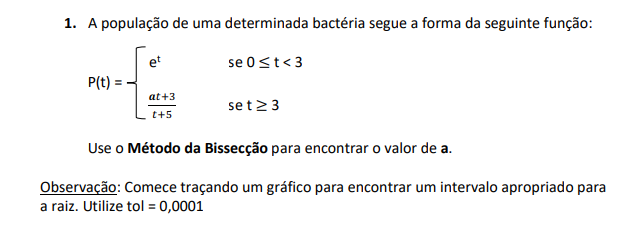

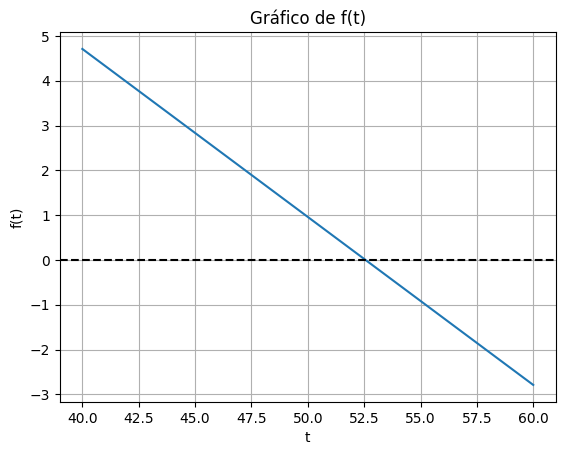


Método da Bissecção
Número de iterações: 18
Raiz: 52.56145477294922


In [ ]:
def f(x):
  return pow(np.e, 3) - (3 * x + 3) / 8

a = 40
b = 60
epsilon = 0.0001
max_iteracoes = 1000
plotagem(f, a, b)
resultado = bisseccao(a, b, epsilon, max_iteracoes)
if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Bissecção")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
else:
    print("\nMétodo da Bissecção falhou.")

O código fornecido utiliza o método da bissecção para encontrar uma raiz da função $$
f(x) = e^3 - \frac{3x + 3}{8}\ {intervalo} [40, 60]$$



>  **Resultado da Bissecção:**


   - O método da bissecção convergiu para uma raiz aproximada de $x \approx 52.561\$.
   - O número de iterações necessário para atingir essa convergência foi de 18.



> **Interpretação do Resultado:**


   - A raiz encontrada é o valor de \(x\) para o qual $f(x) = 0$.
   - A estratégia da bissecção divide iterativamente o intervalo inicial $[40, 60]$ ao meio e escolhe o subintervalo onde a mudança de sinal ocorre, garantindo a convergência para a raiz.


> **Intervalo Inicial:**


   - A escolha do intervalo inicial foi $[40, 60]$. O método da bissecção requer que a função mude de sinal no intervalo inicial para garantir a existência de uma raiz dentro desse intervalo.



> **Convergência:**


   - O critério de parada foi definido com uma tolerância de $0.0001$, o que significa que o método continua iterando até que o comprimento do intervalo seja menor que $0.0001$. Isso ajuda a obter uma precisão desejada na determinação da raiz.


> **Número de Iterações:**


   - O número relativamente baixo de iterações (18) sugere uma rápida convergência, o que é uma vantagem do método da bissecção. No entanto, a eficiência do método pode variar dependendo da função e do intervalo inicial escolhidos.

O método da bissecção parece ter sido eficaz para encontrar uma raiz da função no intervalo fornecido, e o número de iterações é razoavelmente baixo.


#Questão 2
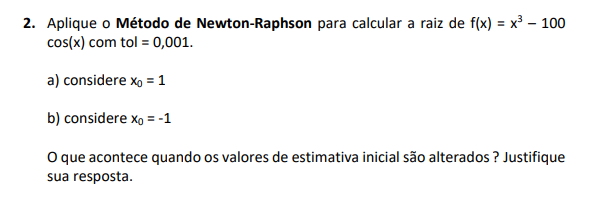

### a) Considerando x0 = 1

In [ ]:
func =  'x**3 - 100 * cos(x)'
x0 = 1
epsilon = 0.001
max_iteracoes= 1000
resultado = newton_raphson(func, x0, epsilon, max_iteracoes)
if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo Newton Raphson:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
else:
    print("\nMétodo Newton Raphson falhou.")


Método Newton Raphson:
Número de iterações: 3
Raiz: 1.5346454577941748


###b) Considerando x0 = -1

In [ ]:
x0 = -1
epsilon = 0.001
max_iteracoes= 1000
resultado = newton_raphson(func, x0, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo Newton Raphson:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
else:
    print("\nMétodo Newton Raphson falhou.")


Método Newton Raphson:
Número de iterações: 3
Raiz: -1.6127561270429593


###Conclusão
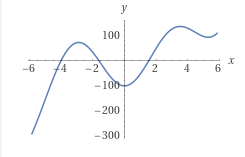

> A convergência e a raiz obtida dependem da escolha da estimativa inicial (x0). Se a estimativa inicial estiver próxima de uma raiz da função, o método tende a convergir para essa raiz. Caso contrário, a convergência pode falhar.



> A escolha de um ponto inicial distante da raiz pode levar o método a convergir para uma raiz diferente ou falhar completamente. Além disso, a função em si também desempenha um papel crucial. Funções com múltiplas raízes, pontos de inflexão ou comportamento complexo podem exigir escolhas cuidadosas para garantir a convergência.



> A tolerância (epsilon) também influencia o resultado. Valores mais baixos de epsilon podem exigir mais iterações para atender à condição de parada, mas podem resultar em raízes mais precisas.


Ao alterar os valores de estimativa inicial, pode-se obter diferentes resultados, incluindo convergência para raízes diferentes ou falha na convergência. A escolha dos parâmetros (ponto inicial, tolerância, número máximo de iterações) deve ser feita considerando a natureza da função a ser analisada.







#Questão 3
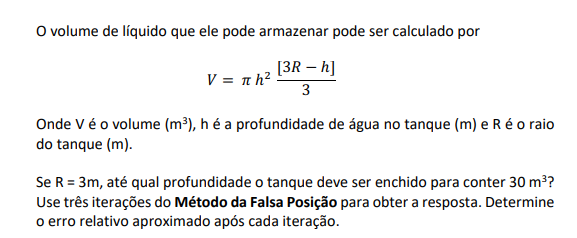



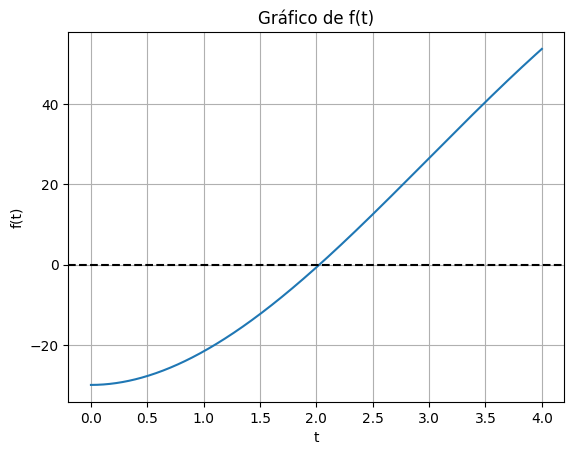

Iteração 1: Raiz = 1.9549317619821607, Erro Relativo Aproximado = 26.729182282315943%
Iteração 2: Raiz = 2.0213344549244763, Erro Relativo Aproximado = 3.2850918253801114%
Iteração 3: Raiz = 2.026503652724887, Erro Relativo Aproximado = 0.25507961919832045%


In [ ]:
def f(h):
  return np.pi * h**2 * (3 * 3 - h) / 3 - 30

a = 0
b = 4
epsilon = 0.001
max_iteracoes = 3
plotagem(f, a, b)

resultado = falsa_posicao_com_erro(f, a, b, epsilon, max_iteracoes)
if resultado is None:
    print("\nMétodo da Falsa Posição falhou.")

##Considerações

Durante a realização dessa questão foi observado 3 convergências no gráfico do Wolfram Alpha. Demonstrando claramente as 3 variáveis presentes nessa questão, com isso foquei nos intervalos que estavam próximos da convergência do "meio" achando assim a raiz aproximada que a questão pedia.

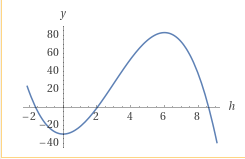



```
Iteração 1: Raiz = 1.9549317619821607, Erro Relativo Aproximado = 26.729182282315943%
Iteração 2: Raiz = 2.0213344549244763, Erro Relativo Aproximado = 3.2850918253801114%
Iteração 3: Raiz = 2.026503652724887, Erro Relativo Aproximado = 0.25507961919832045%
```


> Na última iteração, o erro relativo é bastante baixo (0.0025%), indicando uma boa aproximação.


#Questão 4

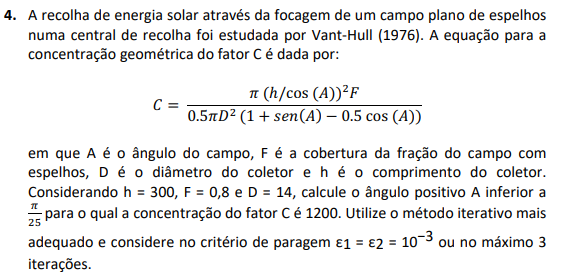

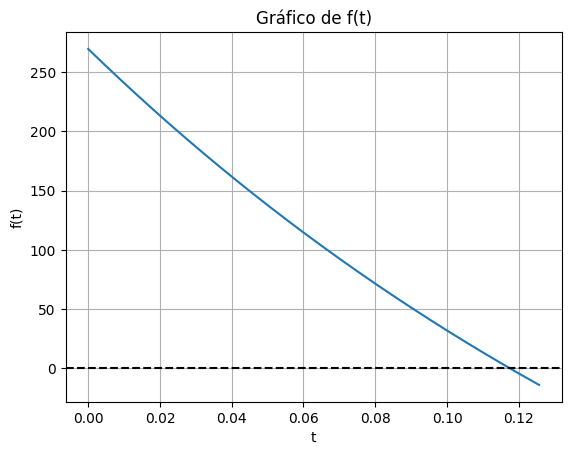


Método da Bissecção
Número de iterações: 3
Raiz: 0.11780972450961726

Método da Falsa Posição:
Número de iterações: 3
Raiz: 0.11763429627155864

Método da Secante:
Número de iterações: 3
Raiz: 0.11760920302195922




In [ ]:
def f(x):
    h = 300
    F = 0.8
    D = 14
    cos_A = np.cos(x)
    sen_A = np.sin(x)
    pi = np.pi

    numerador = pi * (h / cos_A) ** 2 * F
    denominador = 0.5 * pi * D ** 2 * (1 + sen_A - 0.5 * cos_A)

    f = numerador / denominador

    return f - 1200

a = 0
b = np.pi / 25
epsilon = 10e-3
max_iteracoes = 3
plotagem(f, a, b)
resultado = bisseccao(a, b, epsilon, max_iteracoes)
if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Bissecção")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
else:
    print("\nMétodo da Bissecção falhou.")

a = 0
b = np.pi / 25
epsilon = 10e-3
max_iteracoes = 3
resultado = falsa_posicao(a, b, epsilon, max_iteracoes)
if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Falsa Posição:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)

else:
    print("\nMétodo da Falsa Posição falhou.")

# Utilizando o método da secante
x0 = 0
x1 = np.pi / 25
epsilon = 10e-3
max_iteracoes = 3
resultado = secante(f, x0, x1, epsilon, max_iteracoes)
if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Secante:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
    print("\n")
else:
    print("\nMétodo da Secante falhou.")




> Bissecção: Este método dividiu o intervalo de busca pela metade em cada iteração até que encontrasse a raiz com a precisão desejada. A raiz encontrada foi 0.11780972450961726.

> Falsa Posição: Este método usa uma aproximação da raiz para cada iteração, o que pode levar a uma convergência mais rápida em alguns casos. A raiz encontrada foi 0.11763429627155864.



> Secante: Este método usa duas aproximações da raiz para cada iteração, o que pode levar a uma convergência mais rápida em alguns casos. A raiz encontrada foi 0.11760920302195922.

Os valores de raiz encontrados para cada método são bastante próximos, o que indica que todos os três métodos de busca de raízes convergiram para uma raiz aproximada com a mesma precisão. Isso sugere que os três métodos são eficazes para encontrar a raiz da função dada. Já a de Newton Raphson nessa questão seria mais custoso de se implementar, pois precisaria de mais etapas além do necessário, sendo assim não muito vantajosa de se implementar.

#Questão 5
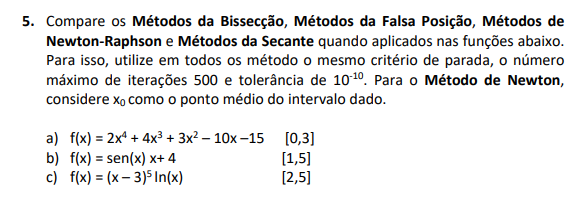

$$
a) f(x) = 2x^4 + 4x^3 + 3x^2 - 10x - 15 \quad [0,3]
$$


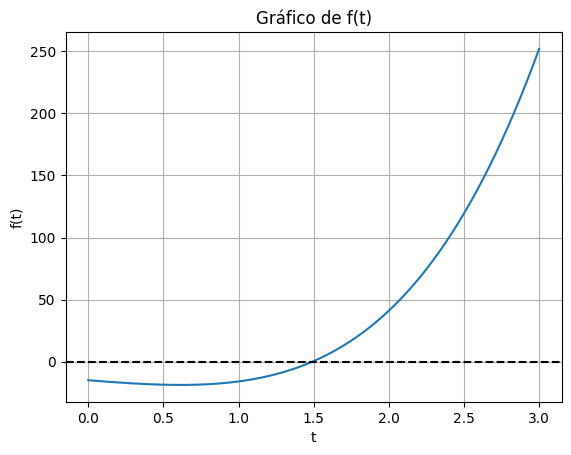


Método da Bissecção 
Número de iterações: 35
A raiz aproximada é: 1.492878708653734

Método da Falsa Posição:
Número de iterações: 77
Raiz: 1.492878708662261

Método Newton Raphson:
Número de iterações: 3
Raiz: 1.4928787086636037

Método da Secante:
Número de iterações: 10
Raiz: -1.300384132642908




In [ ]:
def f(x):
  return 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15


#Método da Bissecção
a = 0
b = 3
epsilon = 1e-10
max_iteracoes= 500
plotagem(f, a, b)
resultado = bisseccao(a, b, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Bissecção ")
    print("Número de iterações:", iteracoes)
    print("A raiz aproximada é:", raiz)
else:
    print("\nMétodo da Bissecção falhou.")

#Método da Falsa Posição
a = 0
b = 3
epsilon = 1e-10
max_iteracoes= 500
resultado = falsa_posicao (a, b, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Falsa Posição:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)

else:
    print("\nMétodo da Falsa Posição falhou.")

# Método Newton Raphson
func =  '2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15'
x0 = 1.5
epsilon = 1e-10
max_iteracoes = 500
resultado = newton_raphson(func, x0, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo Newton Raphson:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
else:
    print("\nMétodo Newton Raphson falhou.")

# Método da Secante
x0 = 0
x1 = 3
epsilon = 1e-10
max_iteracoes = 500
resultado = secante(f, x0, x1, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Secante:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
    print("\n")
else:
    print("\nMétodo da Secante falhou.")




> O Método de Newton-Raphson é o mais eficiente em termos de número de iterações, seguido pelo Método da Bissecção e, em seguida, pelo Método da Secante.



> O Método da Falsa Posição requer mais iterações do que os outros métodos, o que o torna menos eficiente neste caso.





$$
b) f(x) = \sin(x) \cdot x + 4 \quad \text [1,5]
$$

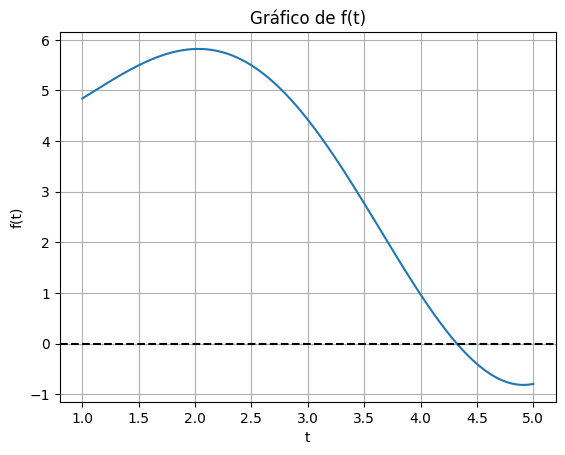


Método da Bissecção 
Número de iterações: 36
Raiz:  4.323239543737145

Método da Falsa Posição:
Número de iterações: 8
Raiz: 4.323239543733132

Método Newton Raphson:
Número de iterações: 5
Raiz: 4.323239543703693

Método da Secante:
Número de iterações: 7
Raiz: 4.3232395437137425




In [ ]:
def f(x):
  return np.sin(x) * x + 4

a = 1
b = 5
epsilon = 1e-10
max_iteracoes= 500
plotagem(f, a, b)

#Método da Bissecção
resultado = bisseccao(a, b, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Bissecção ")
    print("Número de iterações:", iteracoes)
    print("Raiz: ", raiz)
else:
    print("\nMétodo da Bissecção falhou.")

a = 1
b = 5
epsilon = 1e-10
max_iteracoes= 500

#Método da Falsa Posição
resultado = falsa_posicao (a, b, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Falsa Posição:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)

else:
    print("\nMétodo da Falsa Posição falhou.")

func =  'sin(x) * x + 4'
x0 = 3
epsilon = 1e-10
max_iteracoes= 500
resultado = newton_raphson(func, x0, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo Newton Raphson:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
else:
    print("\nMétodo Newton Raphson falhou.")


x0 = 1
x1 = 5
epsilon = 1e-10
max_iteracoes = 500
# Exemplo para o Método da Secante
resultado = secante(f, x0, x1, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Secante:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
    print("\n")
else:
    print("\nMétodo da Secante falhou.")




> O Método de Newton-Raphson mais uma vez demonstra eficiência, realizando um número menor de iterações.




> A Falsa Posição e a Secante também apresentam bom desempenho com um número moderado de iterações.





> A Bissecção, embora geralmente robusta, requer mais iterações neste caso.



$$
c) f(x) = (x - 3)^5 \ln(x) \quad \text [2,5]
$$

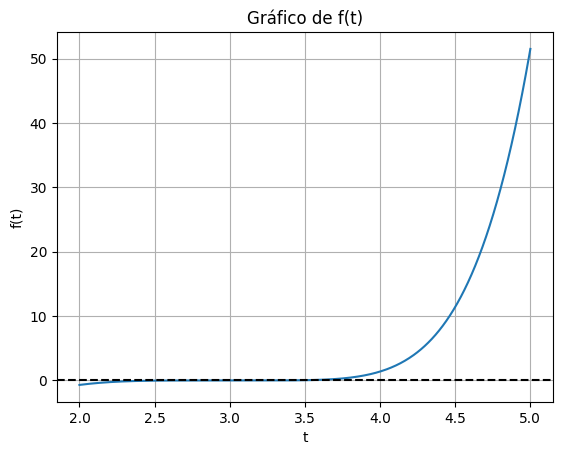


Método da Bissecção 
Número de iterações: 35
Raiz: 2.999999999985448

Método da Falsa Posição:
Número de iterações: 500
Raiz: 2.6757041424572505

Método Newton Raphson:
Número de iterações: 18
Raiz: 3.0092964212684037

Método da Secante:
Número de iterações: 31
Raiz: 2.991007884634376




In [ ]:
def f(x):
  return (x - 3)**5 * np.log(x)

a = 2
b = 5
epsilon = 1e-10
max_iteracoes= 500
plotagem(f, a, b)

# Exemplo para o Método da Bissecção
resultado = bisseccao(a, b, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Bissecção ")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
else:
    print("\nMétodo da Bissecção falhou.")

a = 2
b = 5
epsilon = 1e-10
max_iteracoes= 500

# Exemplo para o Método da Falsa Posição
resultado = falsa_posicao (a, b, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Falsa Posição:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)

else:
    print("\nMétodo da Falsa Posição falhou.")

func =  '(x - 3)**5 * log(x)'
x0 = 3.5
epsilon = 1e-10
max_iteracoes= 500
resultado = newton_raphson(func, x0, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo Newton Raphson:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
else:
    print("\nMétodo Newton Raphson falhou.")

x0 = 2
x1 = 5
epsilon = 1e-10
max_iteracoes = 500
# Exemplo para o Método da Secante
resultado = secante(f, x0, x1, epsilon, max_iteracoes)

if resultado is not None:
    iteracoes, raiz = resultado
    print("\nMétodo da Secante:")
    print("Número de iterações:", iteracoes)
    print("Raiz:", raiz)
    print("\n")
else:
    print("\nMétodo da Secante falhou.")



> O Método de Newton-Raphson novamente se destaca com um número menor de iterações.


> O Método da Bissecção também mostra boa eficiência.



> Tanto o Método da Secante quanto o Método da Falsa Posição requerem mais iterações, sendo a Falsa Posição particularmente ineficiente neste caso.

